In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot, cm

# Compare low/high resolution

<IPython.core.display.Javascript object>


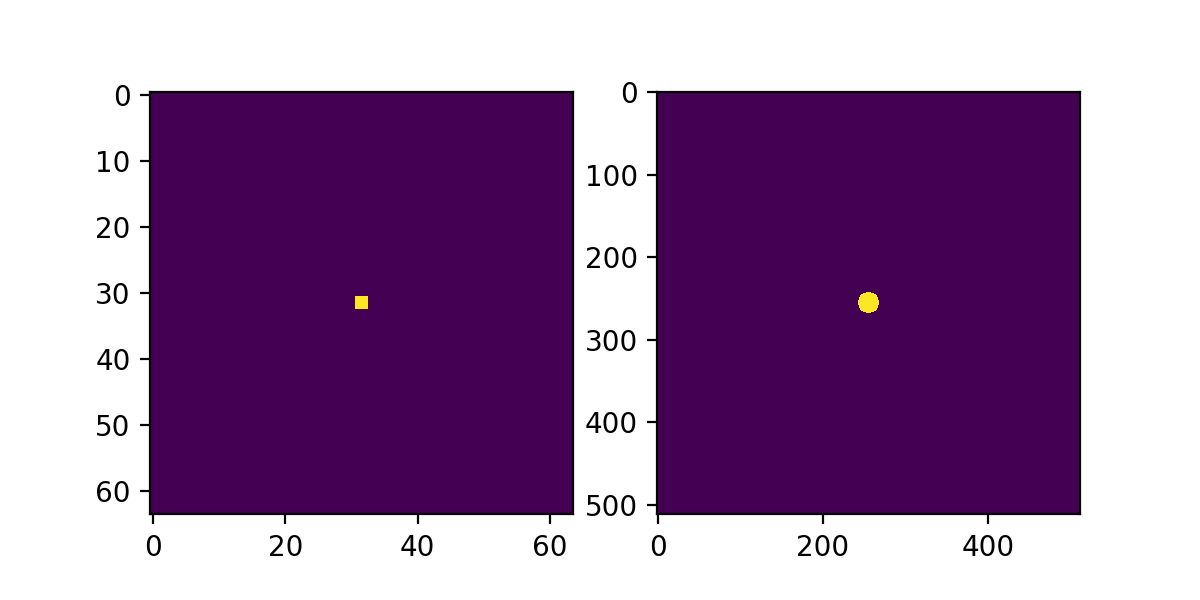

In [2]:
# set diameter
# r = 0.2**2
r = 0.05**2

# define the "low" resolution
N = 64
imageArrayLR = np.zeros(shape=(N,N), dtype=np.float64)
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArrayLR[R < r] = 1.0

# define "high" resolution
N = 512
imageArrayHR = np.zeros(shape=(N,N), dtype=np.float64)
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)

imageArrayHR[R < r] = 1.0

fig = pyplot.figure(figsize=(6,3))
axLR = fig.add_subplot(121)
axHR = fig.add_subplot(122)
axLR.imshow(imageArrayLR)
axHR.imshow(imageArrayHR)

<IPython.core.display.Javascript object>


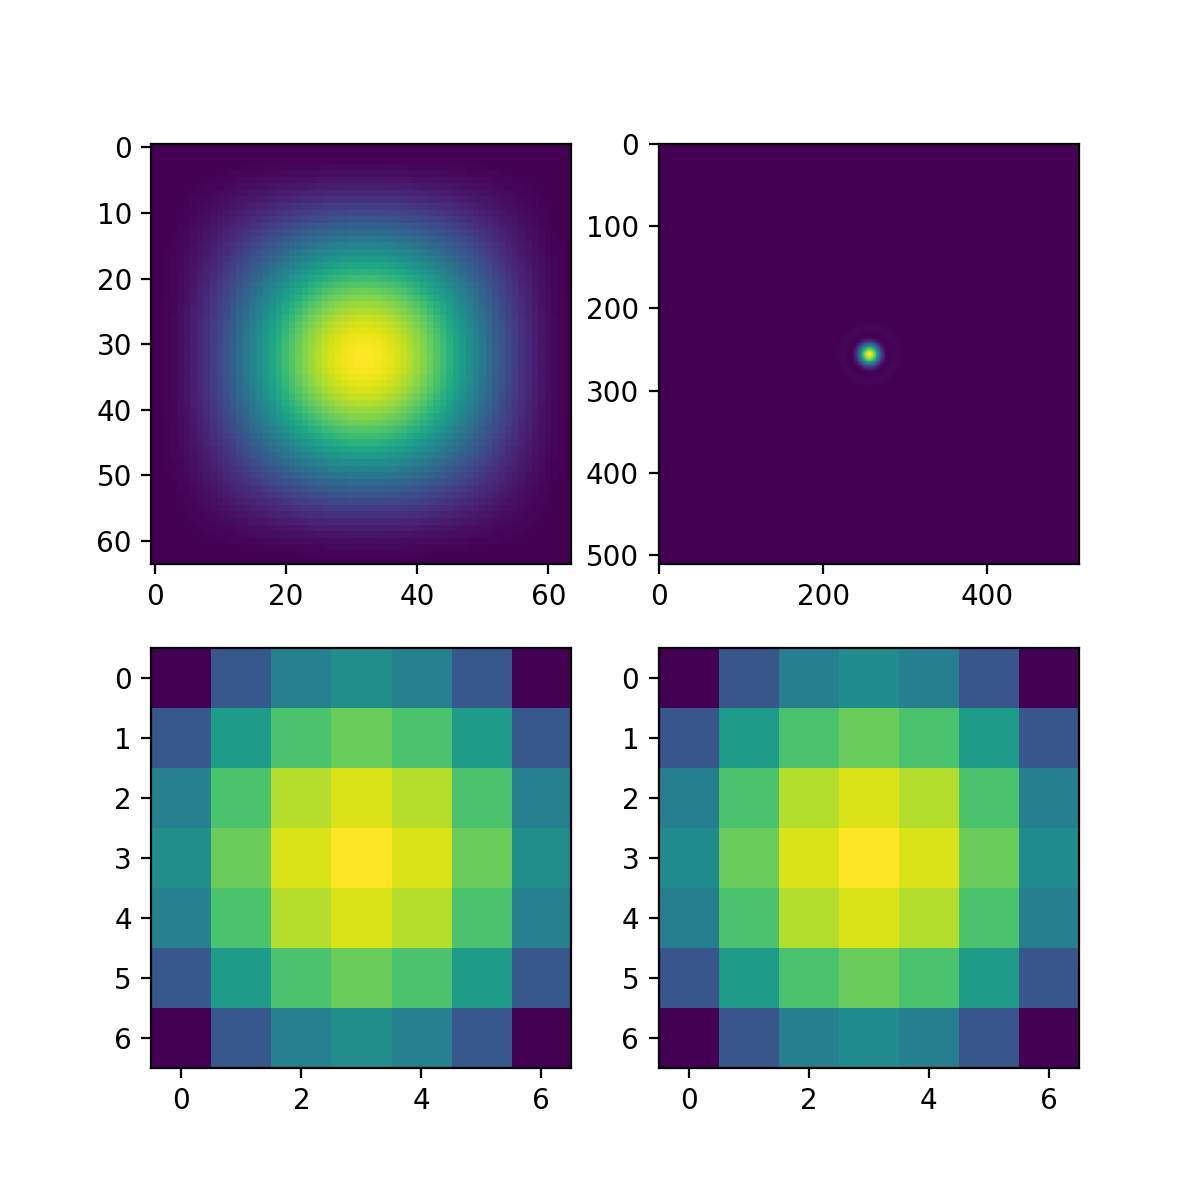

In [3]:
# now for the FFT
N = 64
imageFFTLR = np.fft.fftshift(np.fft.fft2(imageArrayLR)/(N*N))
conjFFTLR = np.conjugate(imageFFTLR)
newImageLR = np.real(np.multiply(imageFFTLR, conjFFTLR))
newImageLRZoom = newImageLR[N//2-3:N//2+4, N//2-3:N//2+4]

N = 512
imageFFTHR = np.fft.fftshift(np.fft.fft2(imageArrayHR)/(N*N))
conjFFTHR = np.conjugate(imageFFTHR)
newImageHR = np.real(np.multiply(imageFFTHR, conjFFTHR))
newImageHRZoom = newImageHR[N//2-3:N//2+4, N//2-3:N//2+4]

fig = pyplot.figure(figsize=(6,6))
axLR = fig.add_subplot(221)
axHR = fig.add_subplot(222)
axLRZoom = fig.add_subplot(223)
axHRZoom = fig.add_subplot(224)
axLR.imshow(newImageLR)
axHR.imshow(newImageHR)
axLRZoom.imshow(newImageLRZoom)
axHRZoom.imshow(newImageHRZoom)

<IPython.core.display.Javascript object>


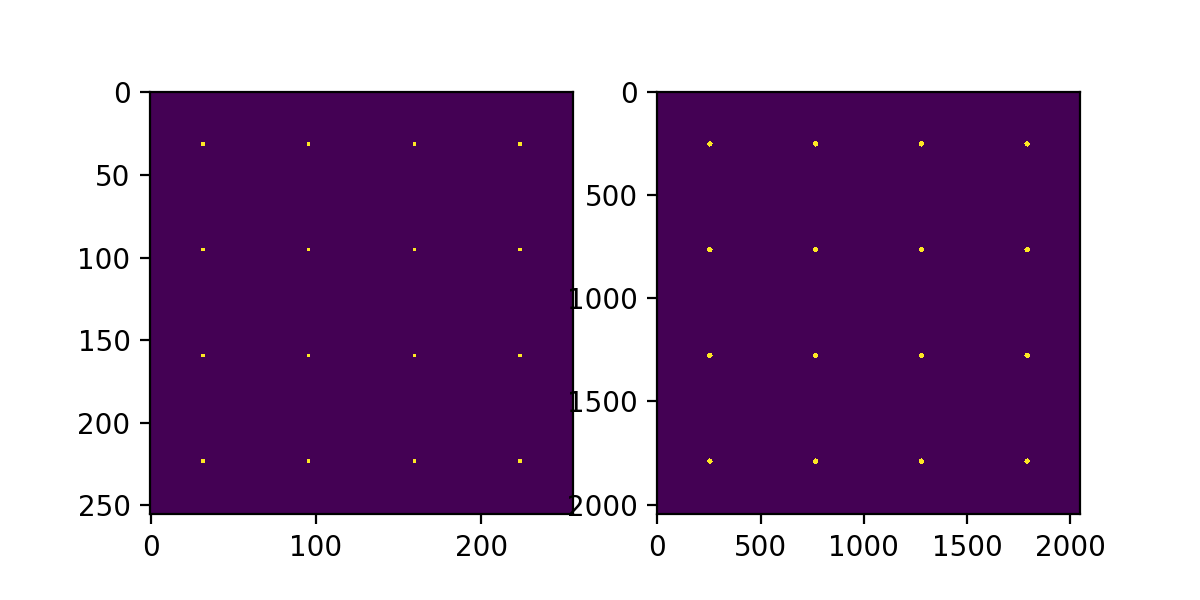

In [4]:
# now let's tile
imageTileLR = np.tile(imageArrayLR, (4,4))
imageTileHR = np.tile(imageArrayHR, (4,4))


fig = pyplot.figure(figsize=(6,3))
axLR = fig.add_subplot(121)
axHR = fig.add_subplot(122)
axLR.imshow(imageTileLR)
axHR.imshow(imageTileHR)

<IPython.core.display.Javascript object>


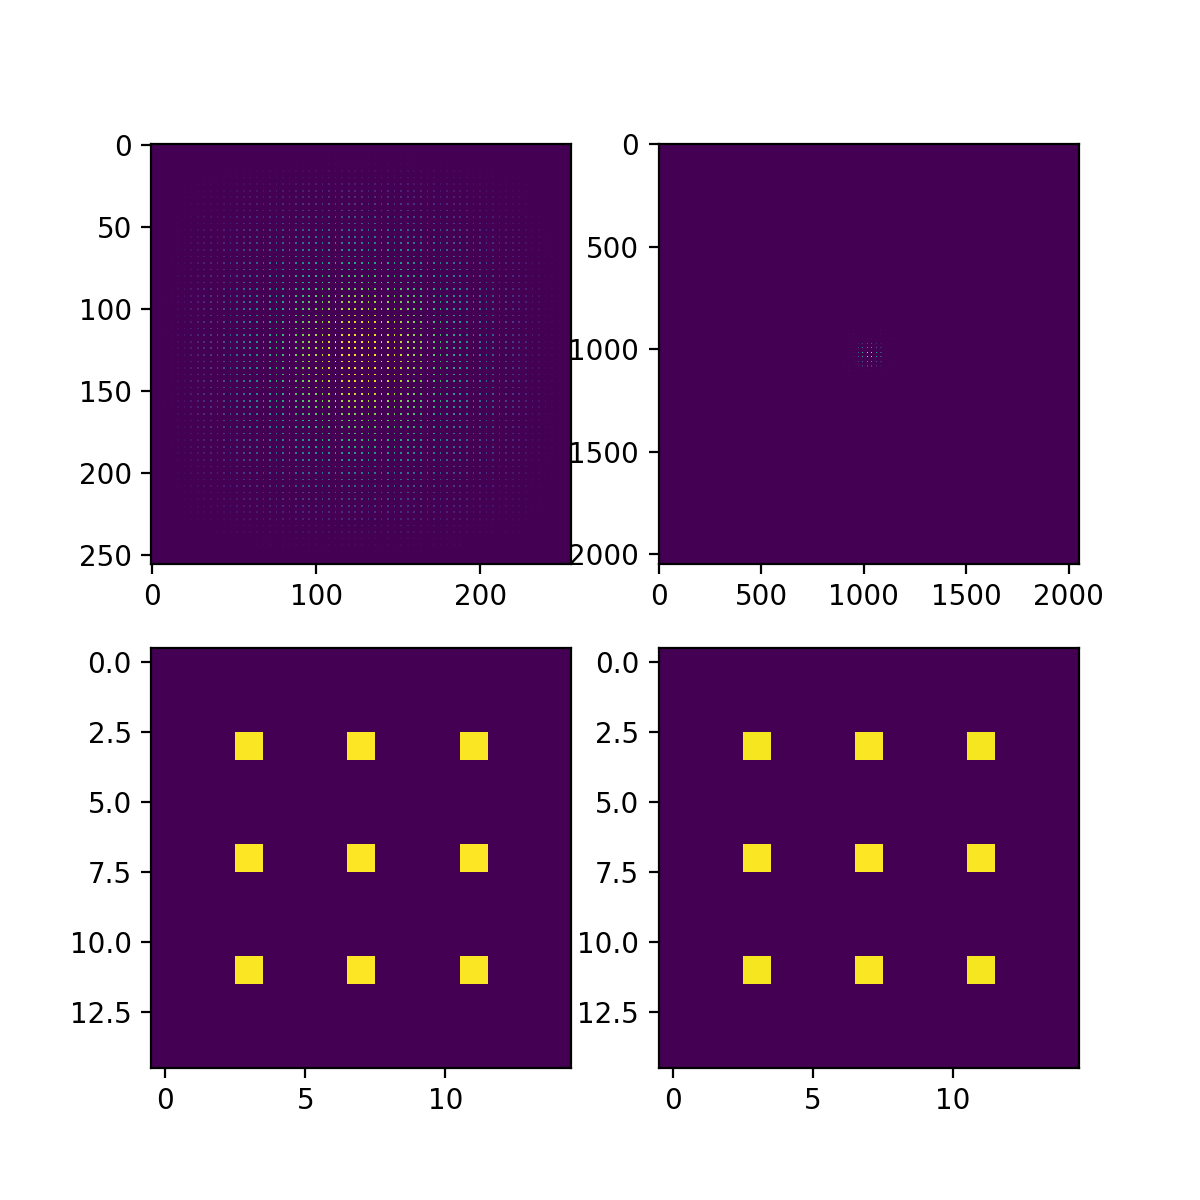

In [6]:
imageFFTLR = np.fft.fftshift(np.fft.fft2(imageTileLR)/(np.shape(imageTileLR)[0]*np.shape(imageTileLR)[1]))
conjFFTLR = np.conjugate(imageFFTLR)
newImageLR = np.real(np.multiply(imageFFTLR, conjFFTLR))
N = np.shape(imageTileLR)[0]
newImageLRZoom = newImageLR[N//2-7:N//2+8, N//2-7:N//2+8]

imageFFTHR = np.fft.fftshift(np.fft.fft2(imageTileHR)/(np.shape(imageTileHR)[0]*np.shape(imageTileHR)[1]))
conjFFTHR = np.conjugate(imageFFTHR)
newImageHR = np.real(np.multiply(imageFFTHR, conjFFTHR))
N = np.shape(imageTileHR)[0]
newImageHRZoom = newImageHR[N//2-7:N//2+8, N//2-7:N//2+8]

fig = pyplot.figure(figsize=(6,6))
axLR = fig.add_subplot(221)
axHR = fig.add_subplot(222)
axLRZoom = fig.add_subplot(223)
axHRZoom = fig.add_subplot(224)
axLR.imshow(newImageLR)
axHR.imshow(newImageHR)
axLRZoom.imshow(newImageLRZoom)
axHRZoom.imshow(newImageHRZoom)

# Reconstruct the image

<IPython.core.display.Javascript object>


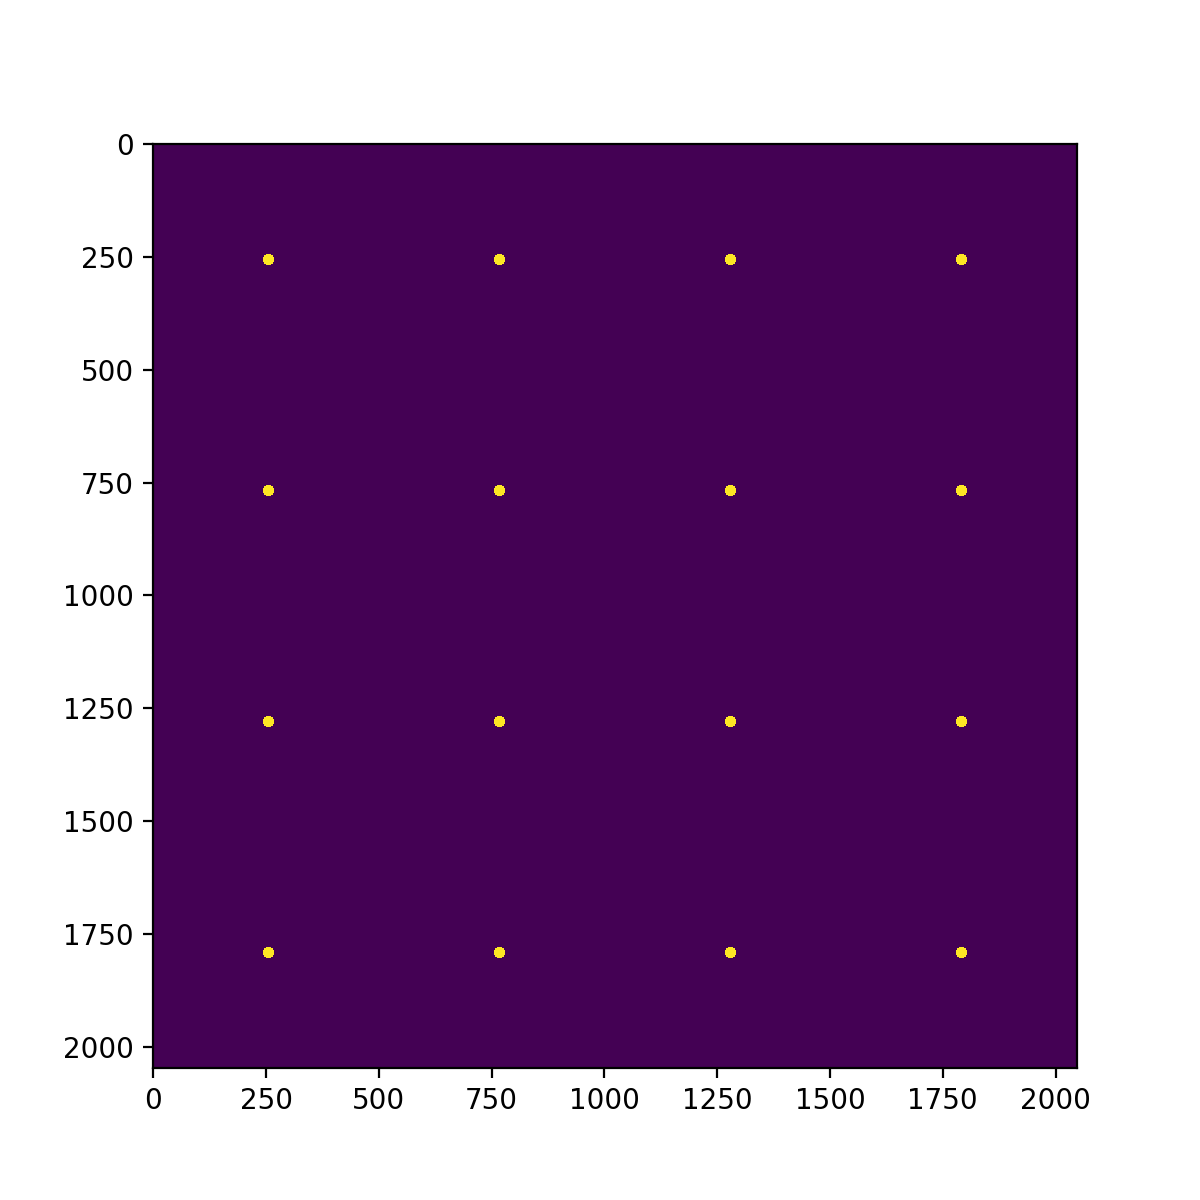

In [7]:
# do the inverse fft
inverseImage = np.fft.ifft2(imageFFTHR)
conjImage = np.conj(inverseImage)
tmpImage = np.real(np.multiply(inverseImage, conjImage))
fig = pyplot.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.imshow(tmpImage)

# Try a convolution to reproduce the lattice

<IPython.core.display.Javascript object>


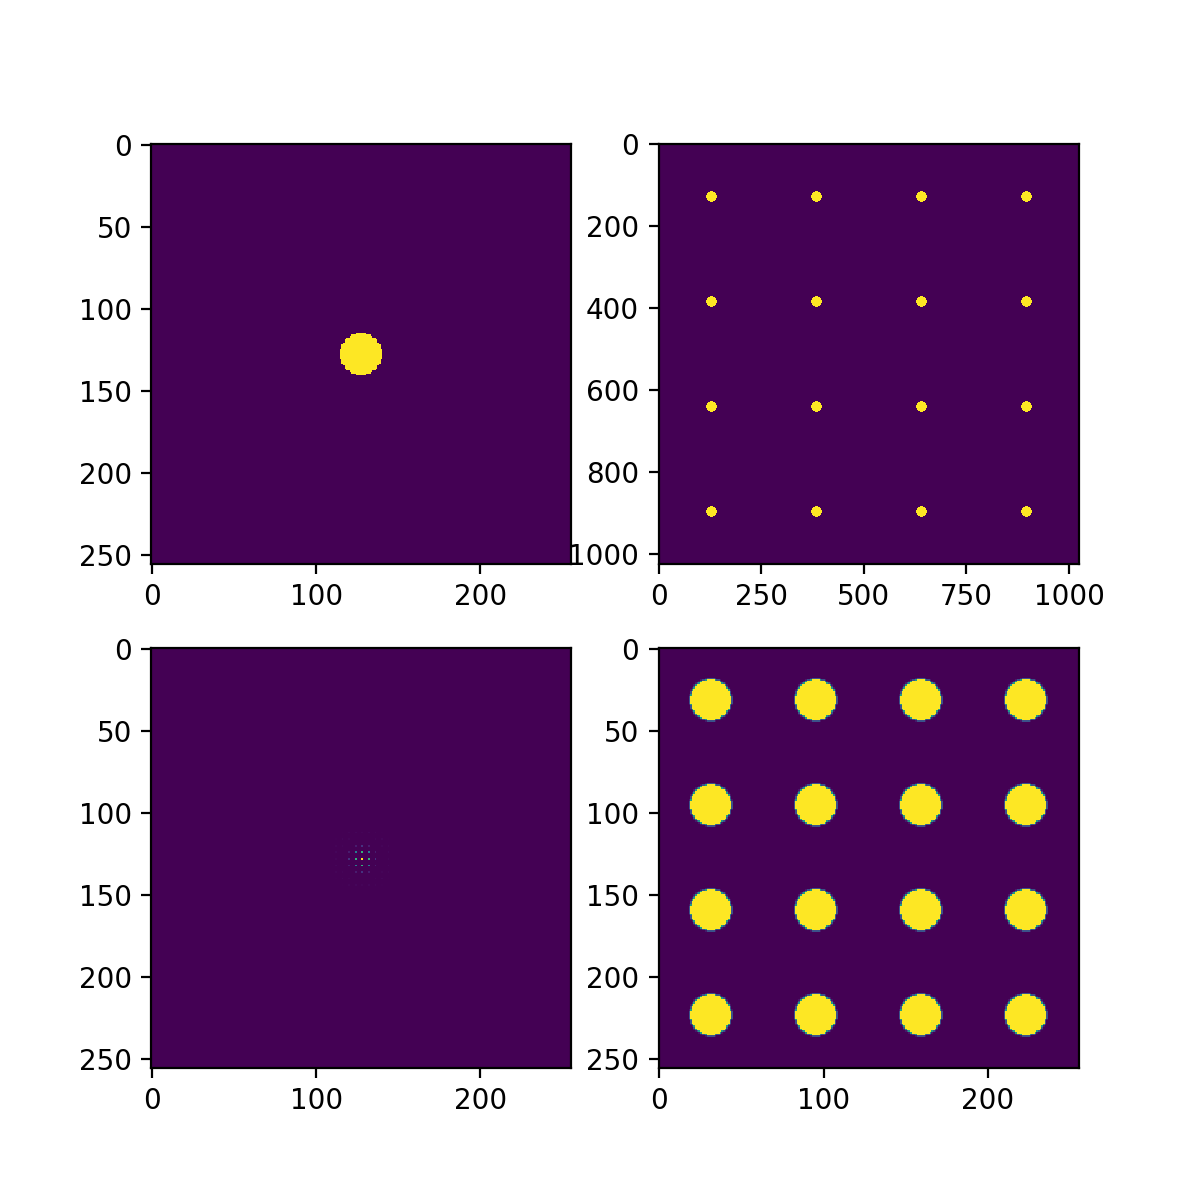

In [13]:
# use the convolution filter
convFilter = imageFFTLR
r = 0.1**2

# define the image
N = 256
imageArray = np.zeros(shape=(N,N), dtype=np.float64)
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < r] = 1.0

fig = pyplot.figure(figsize=(6,6))
ax0 = fig.add_subplot(221)
ax0.imshow(imageArray)

tileArray = np.tile(imageArray, (4, 4))
ax1 = fig.add_subplot(222)
ax1.imshow(tileArray)

# take the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(N*N))
# convolve via multiplication
# newFFT = np.multiply(convFilter, imageFFT)
newFFT = np.multiply(imageFFT, convFilter)
conjFFT = np.conj(newFFT)
tmpFFT = np.real(np.multiply(newFFT, conjFFT))
ax2 = fig.add_subplot(223)
ax2.imshow(tmpFFT)
# conjFFTLR = np.conjugate(imageFFTLR)
# newImageLR = np.real(np.multiply(imageFFTLR, conjFFTLR))
# newImageLRZoom = newImageLR[N//2-3:N//2+4, N//2-3:N//2+4]

# invert and view
inverseImage = np.fft.ifft2(newFFT)
conjImage = np.conj(inverseImage)
tmpImage = np.real(np.multiply(inverseImage, conjImage))
ax3 = fig.add_subplot(224)
ax3.imshow(tmpImage)

# Try the reconstruction by hand

<IPython.core.display.Javascript object>


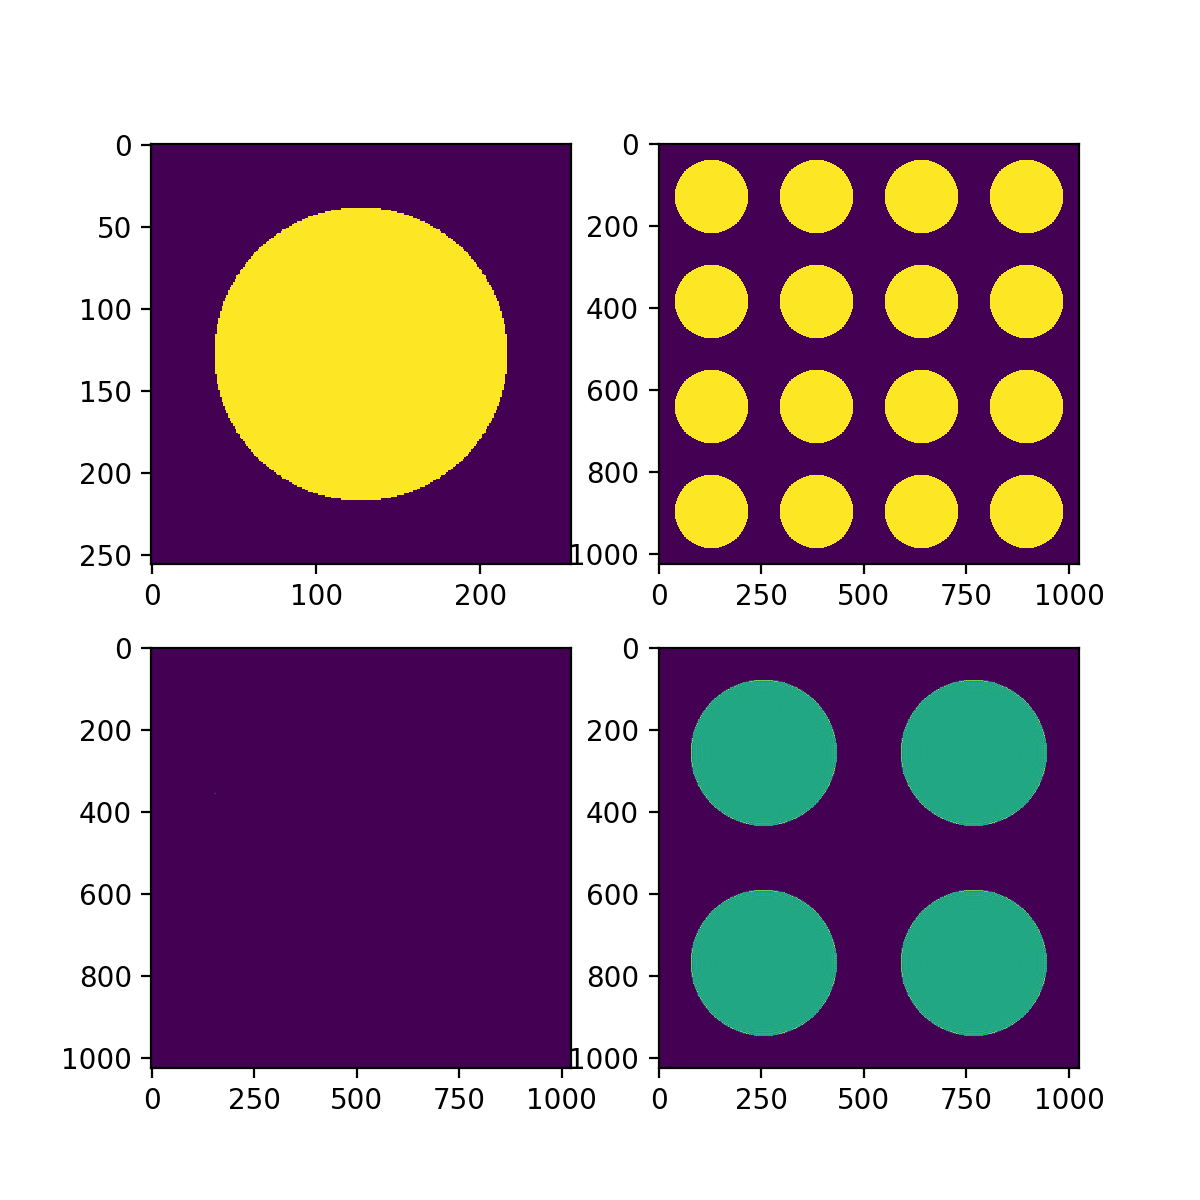

(array([102, 102, 102, ..., 610, 610, 610]), array([   0,    2,    4, ..., 1018, 1020, 1022]))
(1024, 1024)


In [12]:
# use the convolution filter
convFilter = imageFFTLR
r = 0.7**2

# define the image
N = 256
imageArray = np.zeros(shape=(N,N), dtype=np.float64)
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < r] = 1.0

fig = pyplot.figure(figsize=(6,6))
ax0 = fig.add_subplot(221)
ax0.imshow(imageArray)

tileArray = np.tile(imageArray, (4, 4))
ax1 = fig.add_subplot(222)
ax1.imshow(tileArray)

# take the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(N*N))
newFFT = np.zeros(shape=(4*np.shape(imageFFT)[0], 4*np.shape(imageFFT)[1]), dtype=np.complex128)
# it's trivial to create the lattice just by altering the spacing
# need to implement this "generally" so that I can obtain different lattices
for i in range(np.shape(imageFFT)[0]):
    for j in range(np.shape(imageFFT)[1]):
        newFFT[2*i, 2*j] = imageFFT[i, j]
tmpN = 4*np.shape(imageFFT)[0]
# newFFT = newFFT[tmpN//2-127:tmpN//2+128, tmpN//2-127:tmpN//2+128]
# newFFT = newFFT[0:256, 0:256]
tmpN = np.shape(newFFT)[0]
conjFFT = np.conj(newFFT)
tmpFFT = np.real(np.multiply(newFFT, conjFFT))
ax2 = fig.add_subplot(223)
ax2.imshow(tmpFFT)
print(np.where(tmpFFT > 0))
# conjFFTLR = np.conjugate(imageFFTLR)
# newImageLR = np.real(np.multiply(imageFFTLR, conjFFTLR))
# newImageLRZoom = newImageLR[N//2-3:N//2+4, N//2-3:N//2+4]

# invert and view
print(np.shape(newFFT))
inverseImage = np.fft.ifft2(newFFT) * tmpN * tmpN
conjImage = np.conj(inverseImage)
tmpImage = np.real(np.multiply(inverseImage, conjImage))
ax3 = fig.add_subplot(224)
ax3.imshow(tmpImage)

<IPython.core.display.Javascript object>


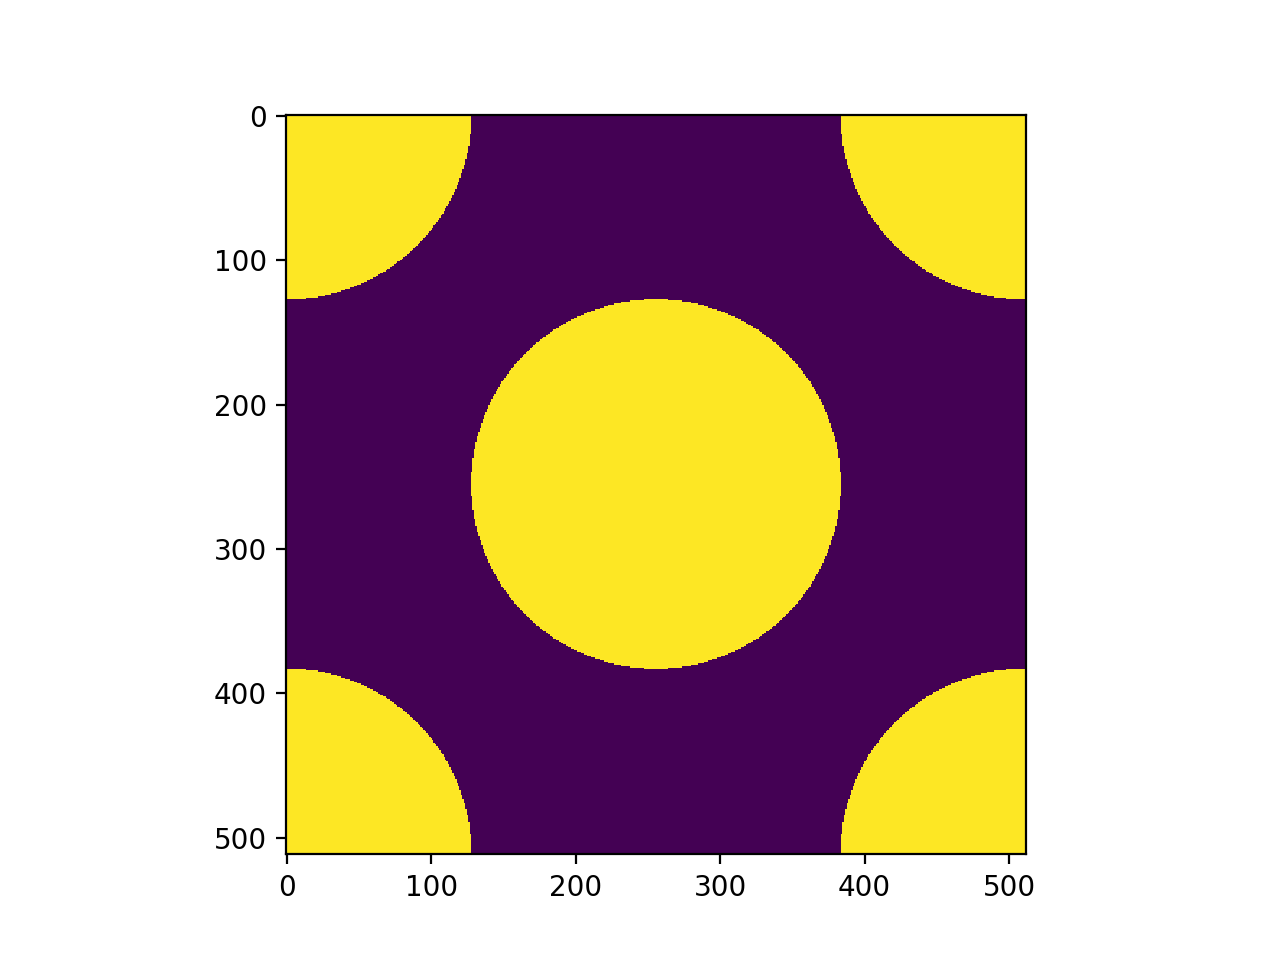

In [28]:
# regardless of the number of times I tile, the FFT is identical, as it should be
# Now to change the periodicity
# define the system image
imageArray = np.zeros(shape=(512,512), dtype=np.float64)
x = np.linspace(-1, 1, 512)
y = np.linspace(-1, 1, 512)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-1), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-1), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+1), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+1), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

pyplot.imshow(imageArray)

<IPython.core.display.Javascript object>


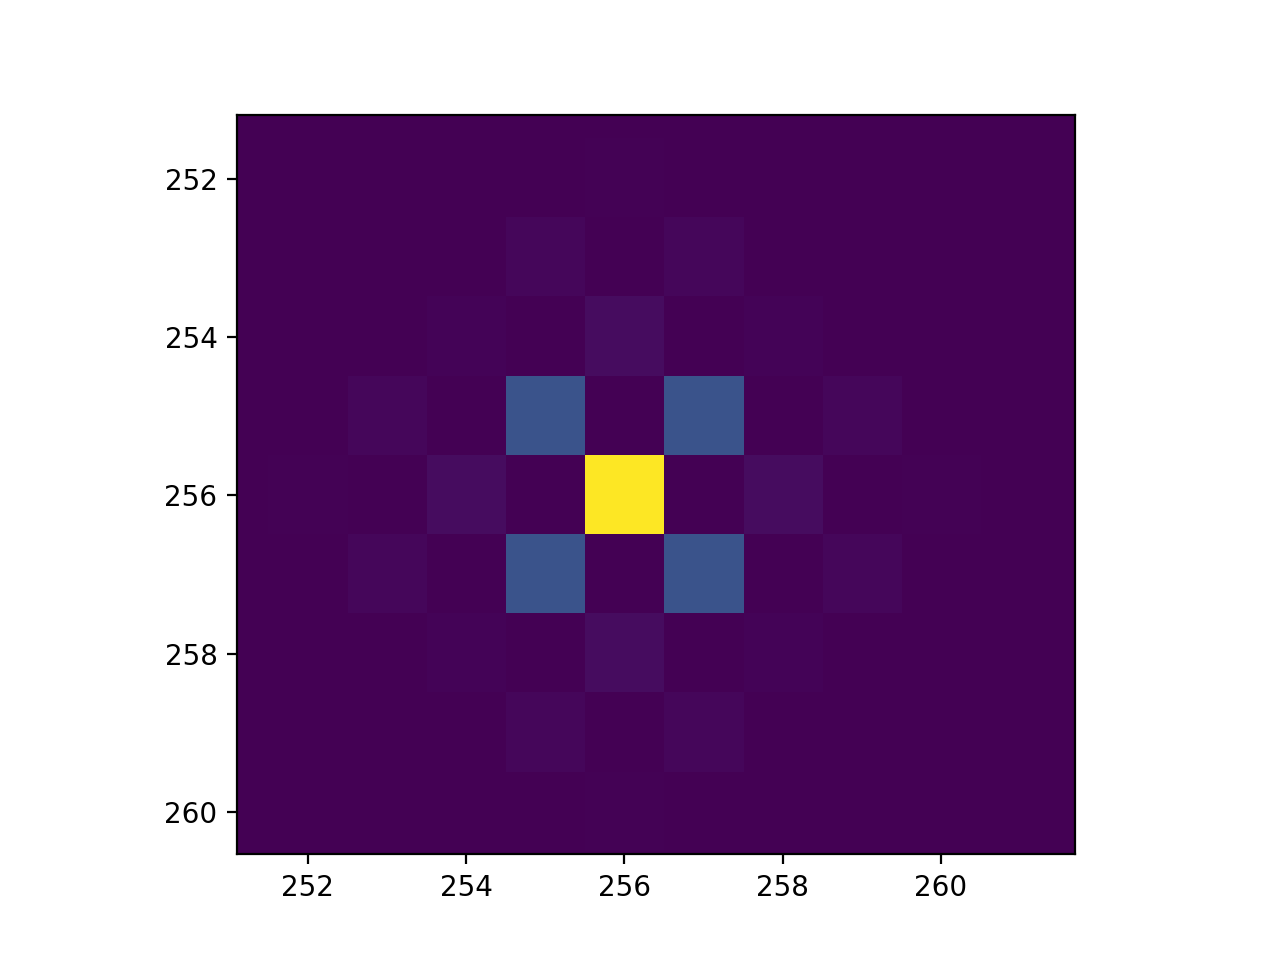

In [34]:
# now for the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(np.shape(imageArray)[0]*np.shape(imageArray)[1]))
conjFFT = np.conjugate(imageFFT)
newImage = np.real(np.multiply(imageFFT, conjFFT))
pyplot.imshow(newImage, vmin=1e-6, vmax=0.15)

<IPython.core.display.Javascript object>


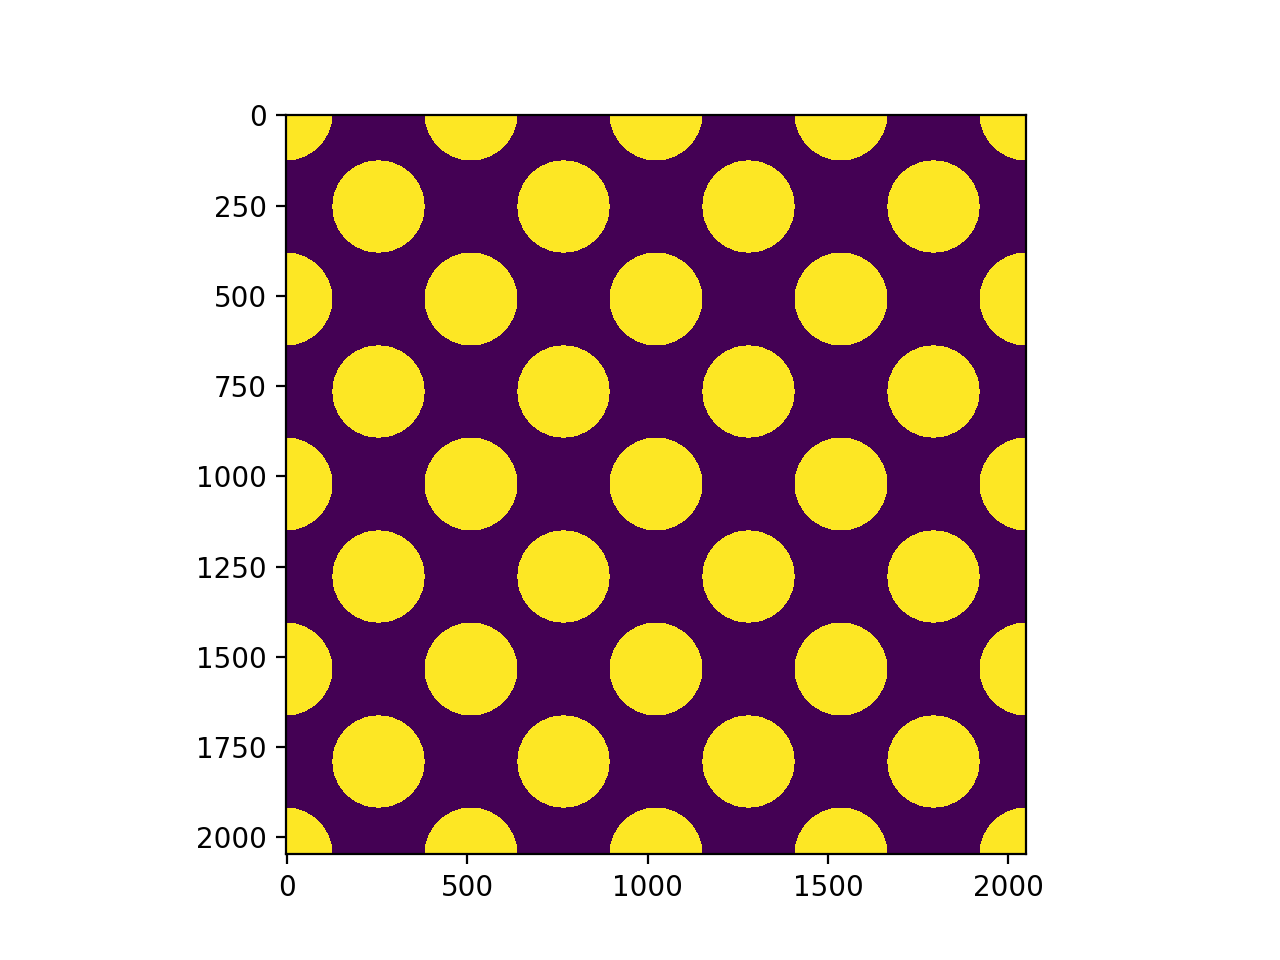

(2048, 2048)

In [38]:
# now let's tile
imageTile = np.tile(imageArray, (4,4))
pyplot.imshow(imageTile)
np.shape(imageTile)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


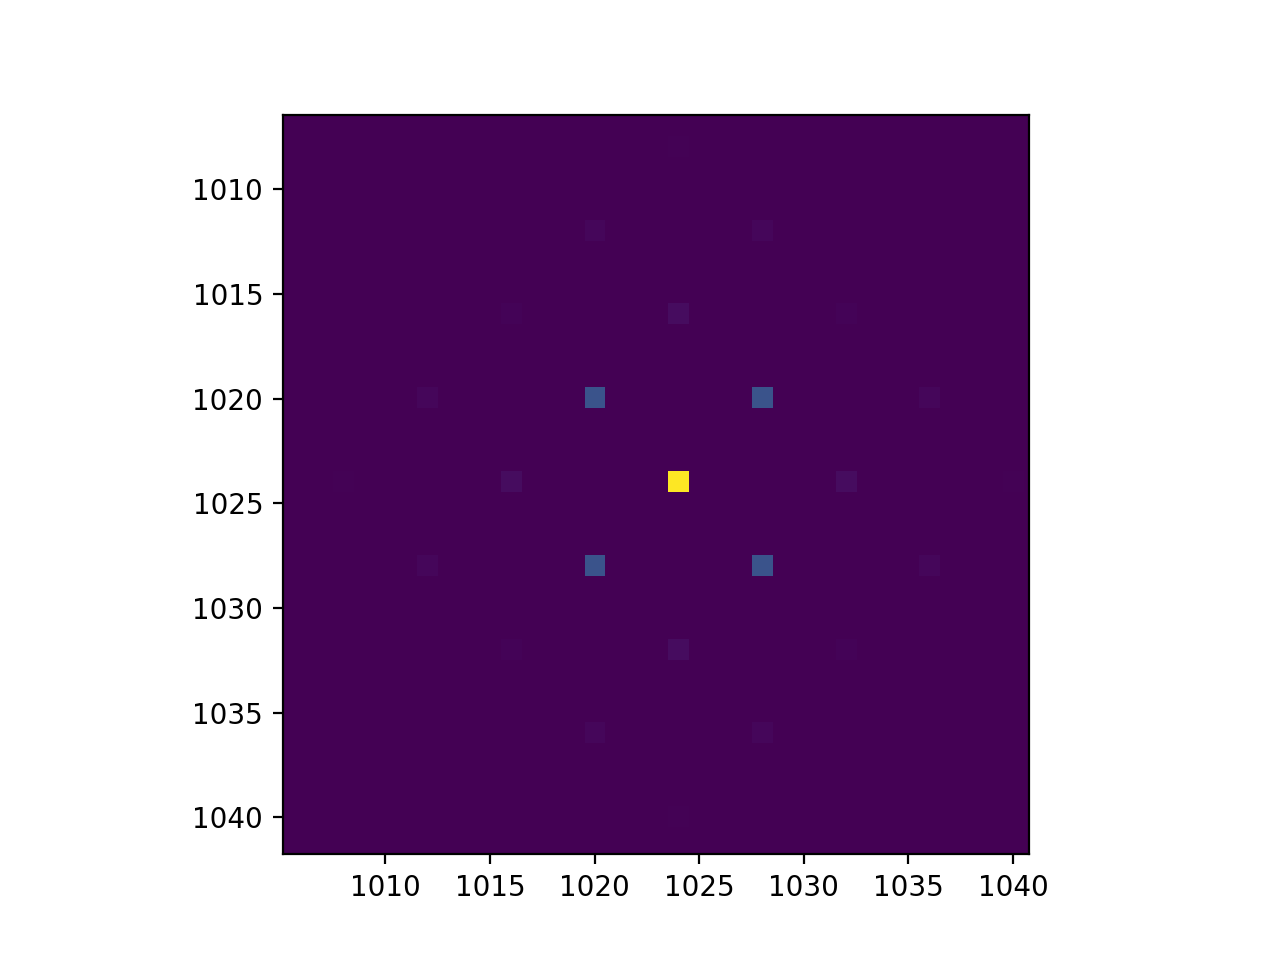

In [37]:
imageFFT = np.fft.fftshift(np.fft.fft2(imageTile)/(np.shape(imageTile)[0]*np.shape(imageTile)[1]))
conjFFT = np.conjugate(imageFFT)
newImage = np.real(np.multiply(imageFFT, conjFFT))
print(newImage)
pyplot.imshow(newImage,
             vmin=1e-6, vmax=0.15)

<IPython.core.display.Javascript object>


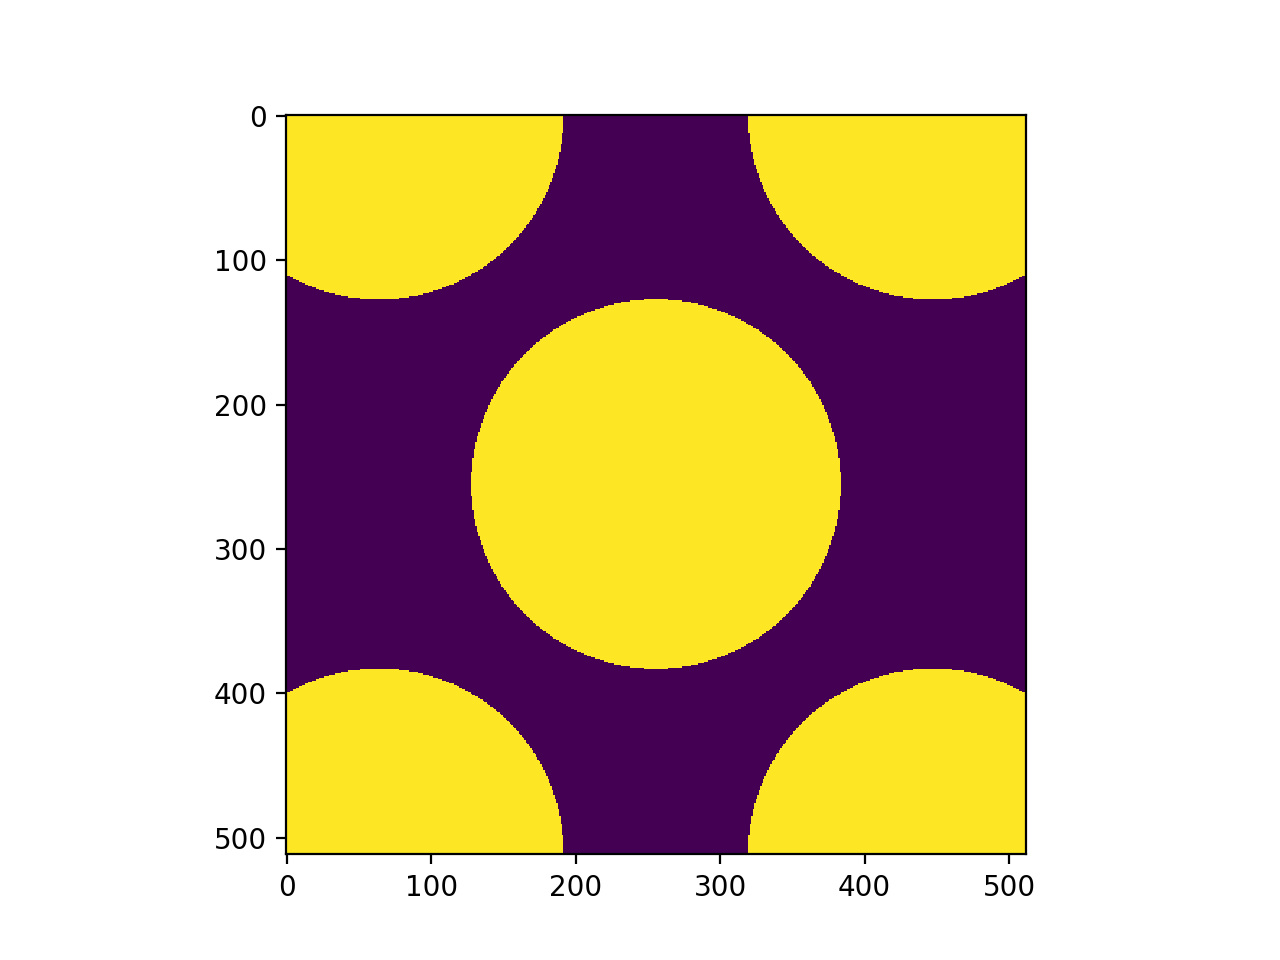

In [39]:
# regardless of the number of times I tile, the FFT is identical, as it should be
# Now to change the periodicity
# define the system image
imageArray = np.zeros(shape=(512,512), dtype=np.float64)
x = np.linspace(-1, 1, 512)
y = np.linspace(-1, 1, 512)
X, Y = np.meshgrid(x, y)

# let's try to see how much I can push the Matlab syntax
R = np.power(X, 2) + np.power(Y, 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-0.75), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X-0.75), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+0.75), 2) + np.power((Y-1), 2)
imageArray[R < 0.25] = 1.0

R = np.power((X+0.75), 2) + np.power((Y+1), 2)
imageArray[R < 0.25] = 1.0

pyplot.imshow(imageArray)

<IPython.core.display.Javascript object>


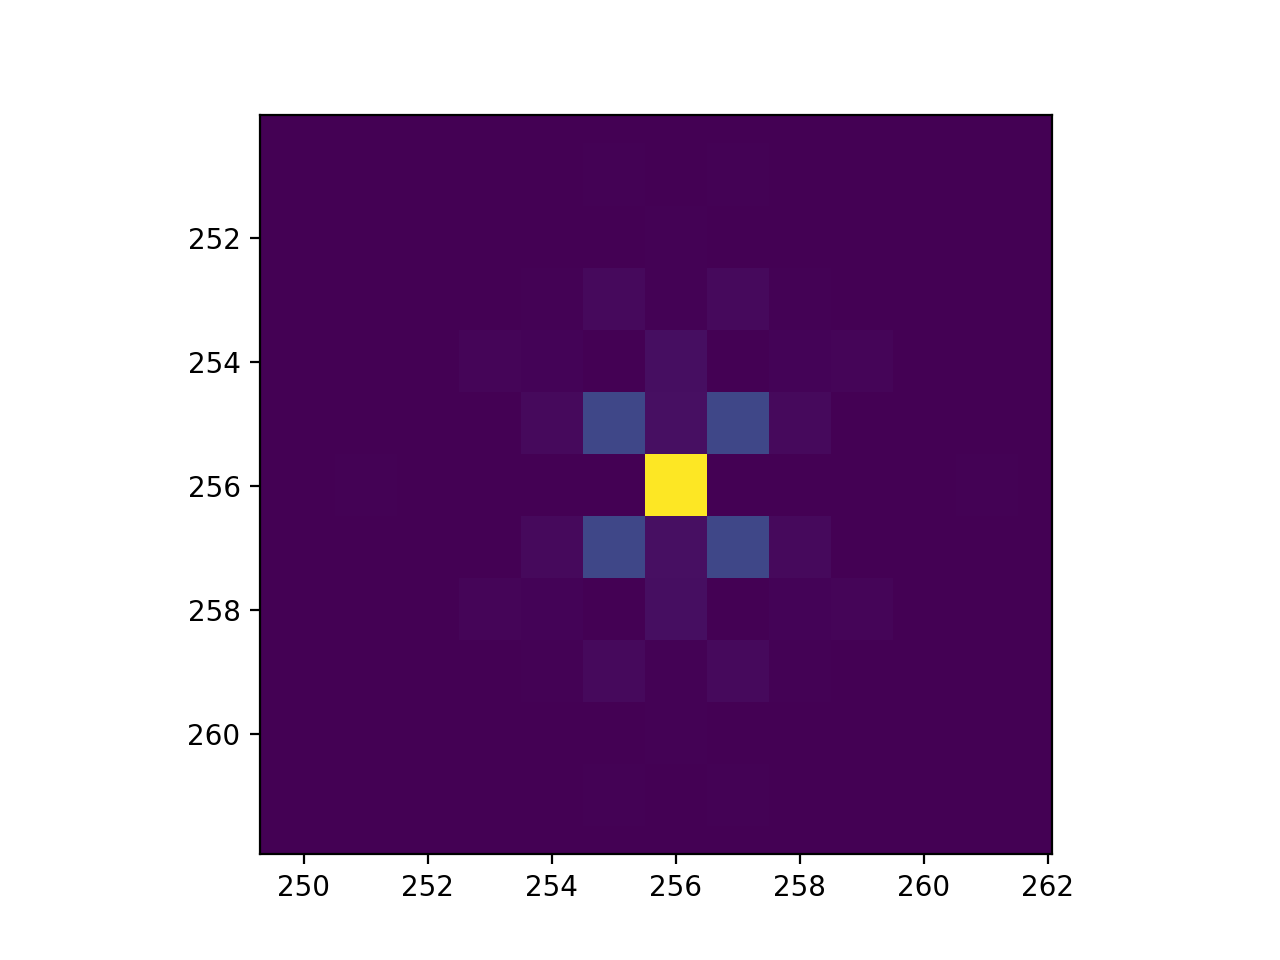

In [40]:
# now for the FFT
imageFFT = np.fft.fftshift(np.fft.fft2(imageArray)/(np.shape(imageArray)[0]*np.shape(imageArray)[1]))
conjFFT = np.conjugate(imageFFT)
newImage = np.real(np.multiply(imageFFT, conjFFT))
pyplot.imshow(newImage, vmin=1e-6, vmax=0.15)